# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import math

from utils.Perspectiver import Perspectiver

In [17]:
data = pd.read_csv("resultados.csv")
categs = np.unique(data["defecto"])
datas = {}
for categ in categs:
    datas[categ] = data[data["defecto"] == categ]
    datas[categ].drop(columns = ["Indice", "defecto"], inplace = True)

/tmp/ipykernel_10271/2268627247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[categ].drop(columns = ["Indice", "defecto"], inplace = True)
/tmp/ipykernel_10271/2268627247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[categ].drop(columns = ["Indice", "defecto"], inplace = True)
/tmp/ipykernel_10271/2268627247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas[categ].drop(columns = ["Indice", "defecto"], in

In [22]:
data[data["Numero de clusters"] == min(data["Numero de clusters"])]


,Indice,Numero de clusters,sp,sr,D.V.Index,evaluacion,defecto
825,825,253,1.175797,46.583279,643027.000118,4881.513507,Scratches
1638,1638,253,1.054226,45.016761,396775.224077,4705.284491,Patches


# Analysis

In [5]:
def plot_info(df):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        axes[i].hist(df[col], bins=10, alpha=0.7, color="blue", edgecolor="black")
        axes[i].set_title(f"Histograma de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

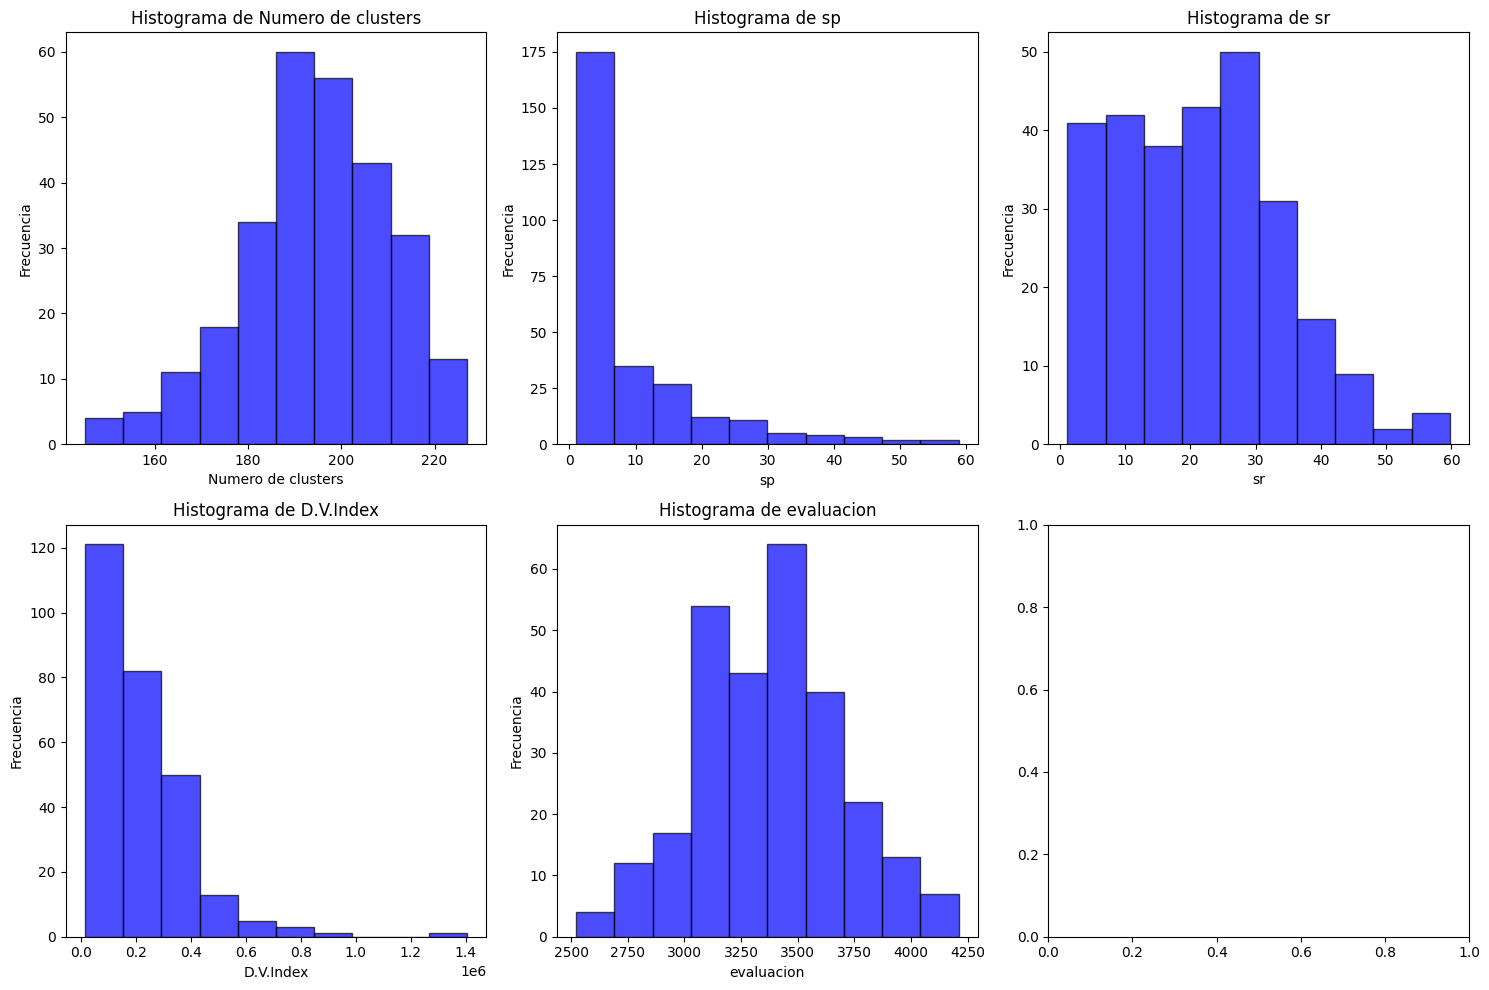

In [9]:
plot_info(datas["Rolled"])